### Database of common fish species for fish market


This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.



https://www.kaggle.com/aungpyaeap/fish-market

#### Feature Description

* Weight: weight of fish in Gram g
* Speies: Species of fish
* Length1: vertical length in cm
* Length2: diagonal length in cm
* Length3: cross length in cm
* Width: diagonal width in cm
* Height: Height in cm




In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('SpaData.csv')
df.head()

,ID,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
0,2342,06-02-15 8:51,20.840,19.745000,433.0,629.75,0.003000,1
1,6419,09-02-15 4:49,19.290,26.890000,0.0,466.00,0.003716,0
2,3330,07-02-15 1:20,20.000,18.700000,0.0,435.50,0.002696,0
3,7188,09-02-15 17:38,22.200,38.433333,429.5,1943.50,0.006381,1
4,7655,10-02-15 1:25,20.245,32.900000,0.0,469.00,0.004833,0


In [3]:
df['GTOccupancy'].value_counts()

0    5125
1    1389
Name: GTOccupancy, dtype: int64

In [4]:
print('Feature Name: ',df.columns.values)

Feature Name:  ['ID' 'TimeStamp' 'Temperature' 'RelativeHumidity' 'Light' 'OxygenLevels'
 'HumidityRatio' 'GTOccupancy']


In [5]:
# All Values is filled not any single value blank
df.isnull().any()

ID                  False
TimeStamp           False
Temperature         False
RelativeHumidity    False
Light               False
OxygenLevels        False
HumidityRatio       False
GTOccupancy         False
dtype: bool

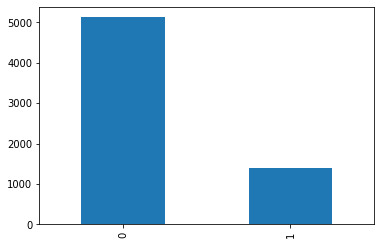

In [6]:
# To see the variation of all kinds of fish
df['GTOccupancy'].value_counts().plot(kind='bar')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,6514.0,4085.903592,2351.028190,1.000000,2048.250000,4104.500000,6129.750000,8143.000000
Temperature,6514.0,20.616220,1.020584,19.000000,19.700000,20.390000,21.390000,23.180000
RelativeHumidity,6514.0,25.766588,5.529035,16.790000,20.290625,26.245000,30.550000,39.090000
Light,6514.0,119.560216,194.654809,0.000000,0.000000,0.000000,256.562500,1546.333333
OxygenLevels,6514.0,607.699139,316.244003,412.750000,439.000000,453.500000,642.583333,2028.500000
HumidityRatio,6514.0,0.003867,0.000852,0.002674,0.003097,0.003801,0.004352,0.006476
GTOccupancy,6514.0,0.213233,0.409622,0.000000,0.000000,0.000000,0.000000,1.000000


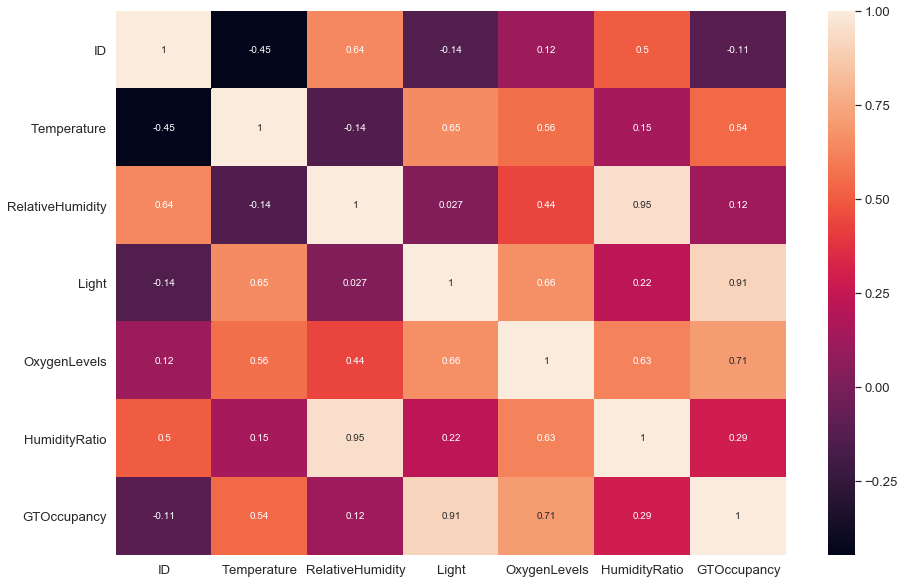

In [8]:
# Need to check if weight is correlated with other features
corrMatrix = df.corr()
sns.set(font_scale=1.2)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 10})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [70]:
X = df.drop('Weight', axis = 1)
Y = df[['Weight']]

In [71]:
X

,Species,Length1,Length2,Length3,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


In [72]:
species_enc = OneHotEncoder(handle_unknown='ignore')

species_enc_df = pd.DataFrame(species_enc.fit_transform(df[['Species']]).toarray())

# df.iloc[:,0].reshape(-1,1)
# type(df[['Species']])
# type(df['Species'])
# species_enc_df
X = species_enc_df.join(X.drop('Species', axis = 1))




# To Avoid Dummy Variable Trap Removing one Feature
# https://www.algosome.com/articles/dummy-variable-trap-regression.html
    

In [88]:
# Deleting One Dummy Variable
del X[0]

In [89]:
# After deleting the one dummy variable.
X

,1,2,3,4,5,6,Length1,Length2,Length3,Height,Width
0,0.0,0.0,0.0,0.0,0.0,0.0,23.2,25.4,30.0,11.5200,4.0200
1,0.0,0.0,0.0,0.0,0.0,0.0,24.0,26.3,31.2,12.4800,4.3056
2,0.0,0.0,0.0,0.0,0.0,0.0,23.9,26.5,31.1,12.3778,4.6961
3,0.0,0.0,0.0,0.0,0.0,0.0,26.3,29.0,33.5,12.7300,4.4555
4,0.0,0.0,0.0,0.0,0.0,0.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,1.0,0.0,11.5,12.2,13.4,2.0904,1.3936
155,0.0,0.0,0.0,0.0,1.0,0.0,11.7,12.4,13.5,2.4300,1.2690
156,0.0,0.0,0.0,0.0,1.0,0.0,12.1,13.0,13.8,2.2770,1.2558
157,0.0,0.0,0.0,0.0,1.0,0.0,13.2,14.3,15.2,2.8728,2.0672


In [90]:
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(106, 11)
(53, 11)
(106, 1)
(53, 1)


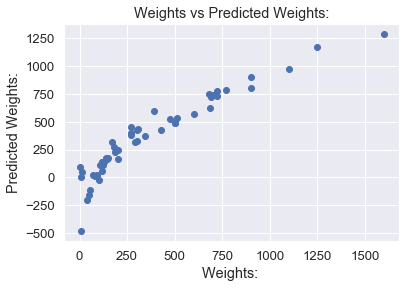

In [91]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Weights: ")
plt.ylabel("Predicted Weights:")
plt.title("Weights vs Predicted Weights:")
plt.show()

In [92]:
lm.coef_

array([[ 294.44951039,  281.90299952,  -78.96842191,  268.8414596 ,
         656.48626285,  239.34062957, -108.59072177,   65.50139546,
          71.21882255,    9.16200786,    5.57652835]])

In [ ]:
# ### UnderStanding what coef does using simple Linear Regress model

#      X                      z
#     [[1, 2],                [[1, 2, 3], 
#      [3, 4],    dot_prod     [3, 4, 5]] 
#      [6, 2],
#      [1, 2],
#      [1, 9]] 

#     Result:
# [[ 7 10 13]
#  [15 22 29]
#  [12 20 28]
#  [ 7 10 13]
#  [28 38 48]]
 
    
    
    
    
    
    
# X = np.random.uniform(size=100).reshape(50, 2) # 50 Rows # 2 Columns
# z = [[1, 2, 3], 
#      [3, 4, 5]]  #Two rows three column
# Target Instance = y
# y = np.dot(X,z)




# First three instances of value for X and y
# print(X[0:3])
# print('-------------------------------------------')
# print(y[0:3])



# Notice, that y[0] = 1*x[0]+3*x[1], y[1] = 2*x[0] + 4*x[1] and y[2] = 3*x[0] + 5*x[1] 
# (that's how we created the data with the matrix multiplication).

# clf_linear_regres = LinearRegression()
# clf_linear_regres.fit(X, y) 
# print(clf_linear_regres.coef_)
# [[1. 3.]
#  [2. 4.]
#  [3. 5.]]


In [96]:
# https://datatofish.com/statsmodels-linear-regression/
import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant to replicate the situation (Adding x0 custom way as ones)
# y = b0x0 * yb1x1 * b2x3................
# This Case if by default in Linear Regression Model Selection
# Significance level =0.05
# Now Performing Backward Elimination with this Statsmodel with full feature then removing each feature one by one.
# Optimal Features
X_opt = X
OLS = sm.OLS(Y,X_opt).fit()
print(OLS.summary())




                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 30 May 2020   Prob (F-statistic):           6.85e-82
Time:                        08:09:22   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -918.3321    127.083     -7.226      0.0

In [101]:
# Lower the p-value for indepndent variable. the more significance your model is going to be with dependent variable
X_opt = X.drop(X.columns[2], axis=1)
OLS = sm.OLS(Y,X_opt).fit()
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     214.7
Date:                Sat, 30 May 2020   Prob (F-statistic):           8.73e-83
Time:                        08:15:27   Log-Likelihood:                -942.17
No. Observations:                 159   AIC:                             1906.
Df Residuals:                     148   BIC:                             1940.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -779.8532     39.581    -19.703      0.0

In [103]:
# Lower the p-value for indepndent variable. the more significance your model is going to be with dependent variable
X_opt = X.drop(X.columns[4], axis=1)
OLS = sm.OLS(Y,X_opt).fit()
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     214.8
Date:                Sat, 30 May 2020   Prob (F-statistic):           8.55e-83
Time:                        08:16:31   Log-Likelihood:                -942.15
No. Observations:                 159   AIC:                             1906.
Df Residuals:                     148   BIC:                             1940.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -785.7286     48.444    -16.219      0.0

### Some Interview Questions

#### What is the difference between R-squared and Adjusted R-Squared value?

https://www.quora.com/What-is-the-difference-between-R-squared-and-Adjusted-R-squared

R square is the coefficient of determination, is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
It ranges 0-1

But having high  R2 always means a good model?

No. The reason is simply that increasing the number of variables increases by  R2.

Adjusted  R2 decreases with the addition of more explanatory variables and hence are more reliable than  R2 

R2Adjusted does not increase with the addition of insignificant variables. Instead, it decreases with it. Only with significant variables addition it increases. Hence it is more reliable than 

#### What are the various assumptions used while building in a LInear regression model?

http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html


There are four assumptions associated with a linear regression model:

- Linearity: The relationship between X and the mean of Y is linear.
- Homoscedasticity: The variance of residual is the same for any value of X.
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.

#### What are the different disadvantages of linear regression model?


https://sciencing.com/disadvantages-linear-regression-8562780.html

- Linear Regression Is Limited to Linear Relationships
- Linear Regression Only Looks at the Mean of the Dependent Variable
- Linear Regression Is Sensitive to Outliers
- Data Must Be Independent

#### What is the difference between RMSE and MSE?

https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/

#### What is gradient descent and how does that help in the interpretations of the model?